### Libraries Installations :

In [21]:
!pip install pandas numpy scikit-learn scipy matplotlib seaborn flask -q


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data :

In [23]:
# Load the datasets
ratingsdf = pd.read_csv('''D:/github/Goodbooks_10k_Recommender_Project/Goodbooks_10k_Recommender_Project/Dataset/ratings.csv''')
booksdf = pd.read_csv('''D:/github/Goodbooks_10k_Recommender_Project/Goodbooks_10k_Recommender_Project/Dataset/books.csv''')
to_readdf = pd.read_csv(r'''D:/github/Goodbooks_10k_Recommender_Project/Goodbooks_10k_Recommender_Project/Dataset/to_read.csv''')
book_tagsdf = pd.read_csv(r'''D:/github/Goodbooks_10k_Recommender_Project/Goodbooks_10k_Recommender_Project/Dataset/book_tags.csv''')
tagsdf = pd.read_csv(r'''D:/github/Goodbooks_10k_Recommender_Project/Goodbooks_10k_Recommender_Project/Dataset/tags.csv''')

In [24]:
print(ratingsdf.head(2))
print(booksdf.head(2))
print(to_readdf.head(2))
print(book_tagsdf.head(2))
print(tagsdf.head(2))

   user_id  book_id  rating
0        1      258       5
1        2     4081       4
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   

   ratings_3  ratings_4  ratings_5  

In [25]:
# Check for missing values
print(ratingsdf.isnull().sum())
print(booksdf.isnull().sum())
print(to_readdf.isnull().sum())
print(book_tagsdf.isnull().sum())
print(tagsdf.isnull().sum())

user_id    0
book_id    0
rating     0
dtype: int64
book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
user_id    0
book_id    0
dtype: int64
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
tag_id      0
tag_name    0
dtyp

In [26]:
# Fill missing values in booksdf
booksdf['original_publication_year'] = booksdf['original_publication_year'].fillna(booksdf['original_publication_year'].mean())
booksdf['original_title'] = booksdf['original_title'].fillna(booksdf['original_title'].mode()[0])
booksdf['language_code'] = booksdf['language_code'].fillna('Unknown')

In [27]:
# Merge ratings with books metadata on book_id
master_data = ratingsdf.merge(booksdf, on='book_id', how='left')
master_data.head(3)

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
1,2,4081,4,231,231,1005335,53,312424442,9.780312e+12,Tom Wolfe,...,19293,21580,1891,1481,2886,6557,6890,3766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2,2,260,5,4865,4865,2370171,353,NaN,9.780672e+12,Dale Carnegie,...,282623,305437,7909,6734,13880,50529,94743,139551,https://images.gr-assets.com/books/1442726934m...,https://images.gr-assets.com/books/1442726934s...


In [28]:
# Merge book_tags with tags to get tag names
book_tagsdf = book_tagsdf.merge(tagsdf, on='tag_id', how='left')
book_tagsdf.head(3)

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites


In [29]:
# Aggregate tags for each book
tags_aggregated = book_tagsdf.groupby('goodreads_book_id')['tag_name'].apply(lambda x: ', '.join(x)).reset_index()
tags_aggregated.head(3)

,goodreads_book_id,tag_name
0,1,"to-read, fantasy, favorites, currently-reading..."
1,2,"to-read, currently-reading, fantasy, favorites..."
2,3,"to-read, favorites, fantasy, currently-reading..."


In [30]:
# Merge aggregated tags with the master_data
master_data = master_data.merge(tags_aggregated, left_on='goodreads_book_id', right_on='goodreads_book_id', how='left')
master_data.head(3)

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...,"to-read, currently-reading, favorites, fiction..."
1,2,4081,4,231,231,1005335,53,312424442,9.780312e+12,Tom Wolfe,...,21580,1891,1481,2886,6557,6890,3766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,"to-read, fiction, currently-reading, favorites..."
2,2,260,5,4865,4865,2370171,353,NaN,9.780672e+12,Dale Carnegie,...,305437,7909,6734,13880,50529,94743,139551,https://images.gr-assets.com/books/1442726934m...,https://images.gr-assets.com/books/1442726934s...,"non-fiction, to-read, self-improvement, nonfic..."


In [31]:
# Save the master DataFrame to a CSV file for future analysis
master_data.to_csv(r'D:/github/Goodbooks_10k_Recommender_Project/Goodbooks_10k_Recommender_Project/Dataset/master_data.csv', index=False)

In [32]:
# Example Analysis: Visualize the Number of Ratings per Book
# Calculate the count of ratings for each book
ratings_count = master_data['book_id'].value_counts().reset_index()
ratings_count.columns = ['book_id', 'count']

In [33]:
# Merge this count with book metadata to get book titles
ratings_count = ratings_count.merge(booksdf[['book_id', 'title']], on='book_id', how='left')

In [34]:
# Plot the top 20 books with the most ratings
top_20_books = ratings_count.head(20)

C:\Users\sahil\AppData\Local\Temp\ipykernel_22488\490150133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='title', data=top_20_books, palette='viridis')


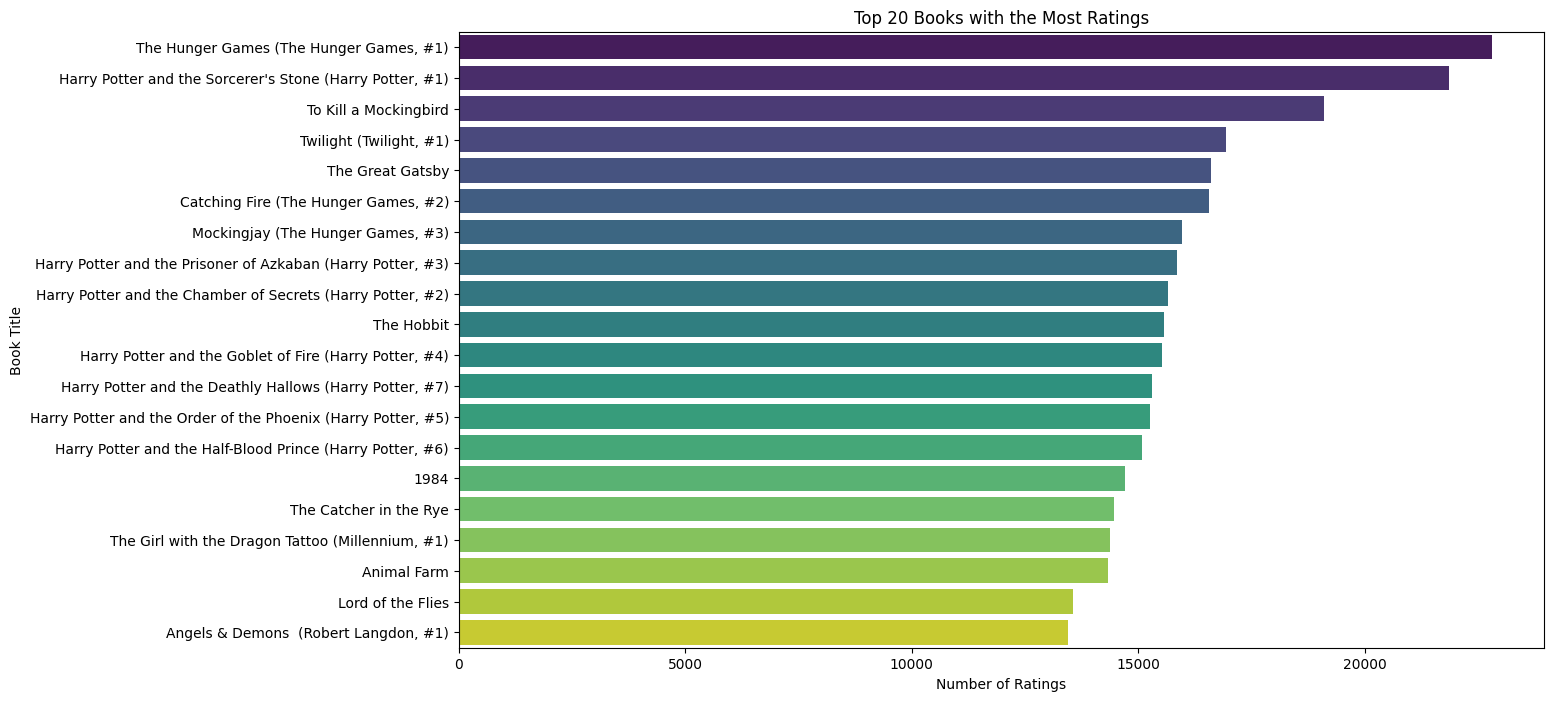

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='title', data=top_20_books, palette='viridis')
plt.title('Top 20 Books with the Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()